# 2.Tehtävä (kNN)

## 2.1 Tietojen esikäsittely

#### Aluksi tuodaan kaikki tarvittavat kirjastot ja tuodaan työhön tarvittavat tiedot


In [228]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)
y = np.ravel(y)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

#### Tarkistetaan saatujen tietojen sisältö

In [229]:
df_x

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Tiedot on saatu röntgenkuvista, ja ne ovat rintasyövän tapausten geometrisia parametreja. Lisäksi on taulukko, jossa kuvataan tietojen kasvainten luokitus (olivatko ne hyvänlaatuisia vai eivät). 
#### Tutustutaan eri sarakkeiden tietotyyppiin

In [230]:
print(df_x.columns)
print(df_x.dtypes)

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2   

#### Koska ero sarakkeiden tiedoissa on melko merkittävä (10-kertaisesta 100-kertaiseen), suoritetaan tietojen normalisointi (Min-Max).

In [231]:
df_normalized = (df_x - df_x.min()) / (df_x.max() - df_x.min())
df_x = df_normalized
df_x

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


#### Tarkastellaan tietojen rakennetta normalisoinnin jälkeen

In [232]:
df_x.describe(include='all')

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
df_y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


#### Tarkastellaan tavoitetaulukon tietojen rakennetta

In [234]:
print(df_y.columns)
print(df_y.dtypes)

Index(['Diagnosis'], dtype='object')
Diagnosis    object
dtype: object


#### Vaihdetaan tietotyyppi objektista kategoriaan. Tämä toimenpide säästää muistia ja parantaa suorituskykyä

In [235]:
df_y['Diagnosis'] = df_y['Diagnosis'].astype('category')

In [236]:
print(df_y.dtypes)

Diagnosis    category
dtype: object


#### Tarkistetaan tiedot tyhjien arvojen varalta

In [237]:
df_x.columns[df_x.isna().any()].tolist()

[]

In [238]:
df_y.columns[df_y.isna().any()].tolist()

[]

## 2.2 Mallin kouluttaminen

### 2.2.1 Jaetaan tiedot koulutus- ja validointijoukkoihin (train, validate)

#### Käytetään scikit-learn-kirjaston `train_test_split`-funktiota tietojen satunnaiseen jakamiseen koulutus- ja testijoukkoihin. 
#### Parametri `random_state` toimii generaattorin alkuarvona tai "siemenenä" satunnaislukujen tuottamiselle. Tämä kiinnittää satunnaislukujen sekvenssin, mikä mahdollistaa saman tietojen jaon toistamisen jokaisessa koodin ajossa. `test_size=0.2` kertoo, kuinka suuri osa tiedoista varataan testijoukolle. Tässä tapauksessa `0.2` tarkoittaa sitä, että testaukseen varataan 20 % tiedoista. 
#### Tärkeimmät tarkoitukset: 
- #### **Satunnaisen prosessin edustus**: 
- #### Scikit-learn-kirjaston `train_test_split`-funktio käytetään tietojen satunnaiseen jakamiseen koulutus- ja testijoukkoihin. 
- #### Parametri `random_state` toimii generaattorin alkuarvona satunnaislukujen tuottamiselle. Tämä kiinnittää satunnaislukujen sekvenssin, mikä mahdollistaa saman tietojen jaon jokaisessa koodin ajossa. 
#### Miksi tämä on tarpeen: 
1. #### **Toistettavuus**: 
- #### Jos `random_state`-parametria ei ole asetettu, jokainen ajo voi tuottaa erilaisen tietojen jaon. Tutkimusten ja käytännön sovellusten kannalta olisi vaikeaa verrata kokeiden tuloksia, jos tiedot muuttuisivat jatkuvasti. 
- #### Kiinteän arvon (esimerkiksi 42) käyttö mahdollistaa saman jaon saamisen koulutus- ja testausjoukkoja varten, kun joku ajaa koodisi uudelleen. 
2. #### **Mallien vertailu**: 
- #### Jos haluat verrata useita malleja samoilla tiedoilla, `random_state`-parametrin kiinnittäminen varmistaa, että arviointi on reilu, koska testaat malleja samoilla tiedoilla. 
3. #### **Vianmääritys ja testaus**: 
- #### Vianmäärityksen ja mallin muokkaamisen aikana on helpompaa seurata suorituskyvyn muutoksia, jos tiedot pysyvät samoina jokaisessa ajossa

In [239]:
RANDOM_STATE = 42
train_data, validate_data, train_targets, validate_targets = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

### 2.2.2 Luodaan ja koulutetaan malli harjoitusaineistolla

#### Tässä vaiheessa luodaan malli ja asetetaan `train_test_split` arvoksi 3 aloitusesimerkkinä. Emme vielä tiedä, mikä `train_test_split`-määrä on paras. Tämä on testausta varten.

In [240]:
knn = KNeighborsClassifier(n_neighbors=3)

#### Seuraavaksi koulutamme mallin harjoitusaineistolla.

In [241]:
knn.fit(train_data, train_targets);

#### Seuraavaksi pyydämme mallia antamaan ennusteet validointiaineistolle `predict`-menetelmällä.

In [242]:
predicted = knn.predict(validate_data)
predicted

array(['M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

#### Seuraavaksi voimme verrata niitä oikeisiin vastauksiin.

In [243]:
np.array(validate_targets)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

#### Lasketaan tarkkuus.

In [244]:
accuracy_score(predicted, validate_targets)

0.9298245614035088

### 2.3 Hyperparametri k:n valinta.

#### Valitaan k-arvo välillä 1-20 (mukaan lukien) ja koulutetaan jokaiselle k-arvolle kNN-luokitinta sekä lasketaan `accuracy_score`-metriikka.

In [245]:
validate_score = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_targets)
    predicted = knn.predict(validate_data)
    acc_score = accuracy_score(predicted, validate_targets)
    
    validate_score.append(acc_score)

#### Analysoidaan tiedot kaaviossa.

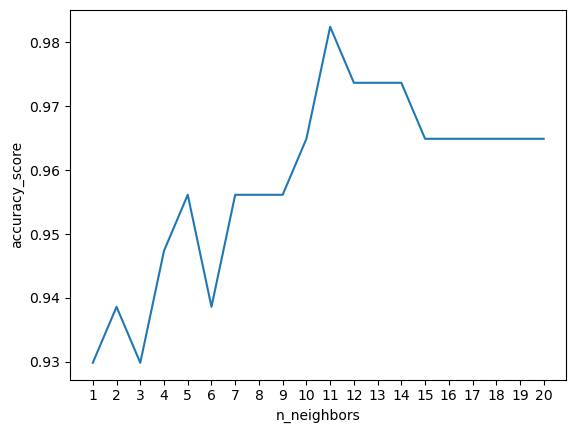

In [246]:
plt.plot(list(range(1, 21)), validate_score)
plt.xticks(list(range(1, 21)))
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_score')
plt.show()

#### Seuraavaksi lasketaan paras k välillä 1-100 (mukaan lukien).

In [247]:
best_accuracy = 0
best_neighbor = 0
for i, k in enumerate(range(1, 101)):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data, train_targets)
    predicted = knn.predict(validate_data)
    acc_score = accuracy_score(predicted, validate_targets)
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_neighbor = k

print(f'Paras naapureiden määrä KNN-luokittimelle on: {best_neighbor}')

Paras naapureiden määrä KNN-luokittimelle on: 11


#### Paras k osoittautui olevan 11.

### 2.4 Luokittelijan tehokkuuden tarkistus ja virhematriisin laatiminen.

#### Luodaan malli parametrilla `n_neighbors=11`, koulutetaan se ja tarkistetaan suorituskyvyn parametrit.

In [248]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_data, train_targets)
predicted = knn.predict(validate_data)
acc_score = accuracy_score(predicted, validate_targets)
print(classification_report(validate_targets, predicted))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Luodaan virhematriisi (confusion matrix)

In [249]:
cm = confusion_matrix(validate_targets, predicted)

#### Näytetään virhematriisi näytöllä

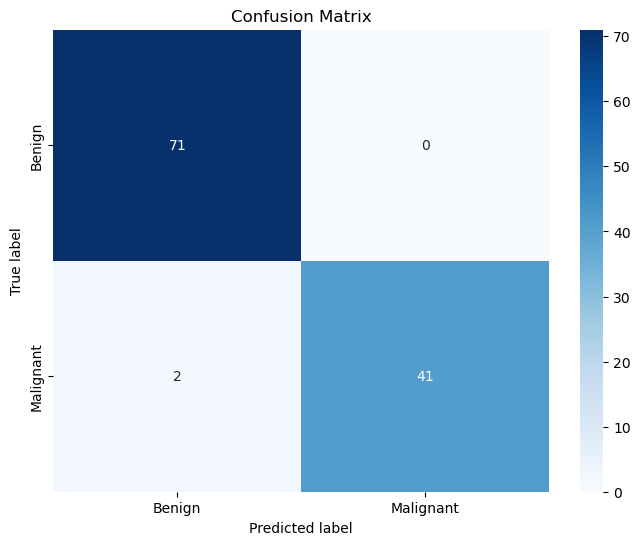

In [250]:
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=('Benign', 'Malignant'), yticklabels=('Benign', 'Malignant'))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## 2.4 Yhteenveto

#### **Hyperparametrin optimointi:**
- #### Onnistuimme määrittämään optimaalisen naapurien määrän (k) mallillemme, mikä mahdollisti parhaan tasapainon ylisovittamisen ja alisovittamisen välillä.
#### **Tarkkuuden parantaminen:**
- #### Optimaalisen k-arvon valinta johti luokittelun tarkkuuden parantumiseen verrattuna mielivaltaisesti valittuun arvoon.
#### **Datan ymmärtäminen:**
- #### Optimaalisen k:n etsintäprosessi antoi meille lisäymmärrystä datamme rakenteesta ja monimutkaisuudesta.
#### **Mallin tehokkuus:**
- #### Optimoitu KNN-malli osoitti hyvää suorituskykyä käytettävissä olevalla datasetillä, mikä vahvistaa sen soveltuvuuden käsiteltävään ongelmaan.
#### **Rajoitukset:**
- #### Optimoinnista huolimatta on muistettava KNN:n rajoitukset, kuten herkkyys kohinalle ja ongelmat korkean dimension datan kanssa.
#### **Käytännön sovellus:**
- #### Optimoitu malli on valmis sovellettavaksi uuteen, näkemättömään dataan, mikä mahdollistaa sen käytön käytännön luokittelutehtävissä tutkittavan ongelman puitteissa.
#### **Validoinnin tärkeys:**
- #### Optimaalisen k:n etsintäprosessi korosti oikean mallin validoinnin tärkeyttä ylisovittamisen estämiseksi ja sen yleistämiskyvyn varmistamiseksi.

#### Tämä analyysi ei ainoastaan mahdollistanut tehokkaan luokittelumallin luomista, vaan myös syvensi ymmärrystämme koneoppimismenetelmien soveltamisesta tiettyyn tehtävään. Saadut tulokset ja kokemus voivat toimia perustana jatkotutkimuksille ja parannuksille data-analyysin ja koneoppimisen alalla.